# Housing Dreams

#### Modelo de regresión lineal múltiple para predecir el precio de casas en la ciudad de Ames desarrollado con Keras

#### 1. Librerias a utilizar

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

#### 2. Datos de entrada

In [96]:
Data = pd.read_csv('house_train_raw.csv')

#### 3. Análisis exploratorio

In [3]:
Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
Data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
Data_notnull = pd.DataFrame(Data.notnull().sum())
Data_notnull = Data_notnull.rename_axis("Atributo").reset_index()
Data_notnull.columns = ["Atributo","Not null"]
Data_null = pd.DataFrame(Data.isnull().sum())
Data_null = Data_null.rename_axis("Atributo").reset_index()
Data_null.columns = ["Atributo","Null"]
Data_total = Data_notnull.merge(Data_null)

Data_total

,Atributo,Not null,Null
0,Id,1460,0
1,MSSubClass,1460,0
2,MSZoning,1460,0
3,LotFrontage,1201,259
4,LotArea,1460,0
...,...,...,...
76,MoSold,1460,0
77,YrSold,1460,0
78,SaleType,1460,0
79,SaleCondition,1460,0


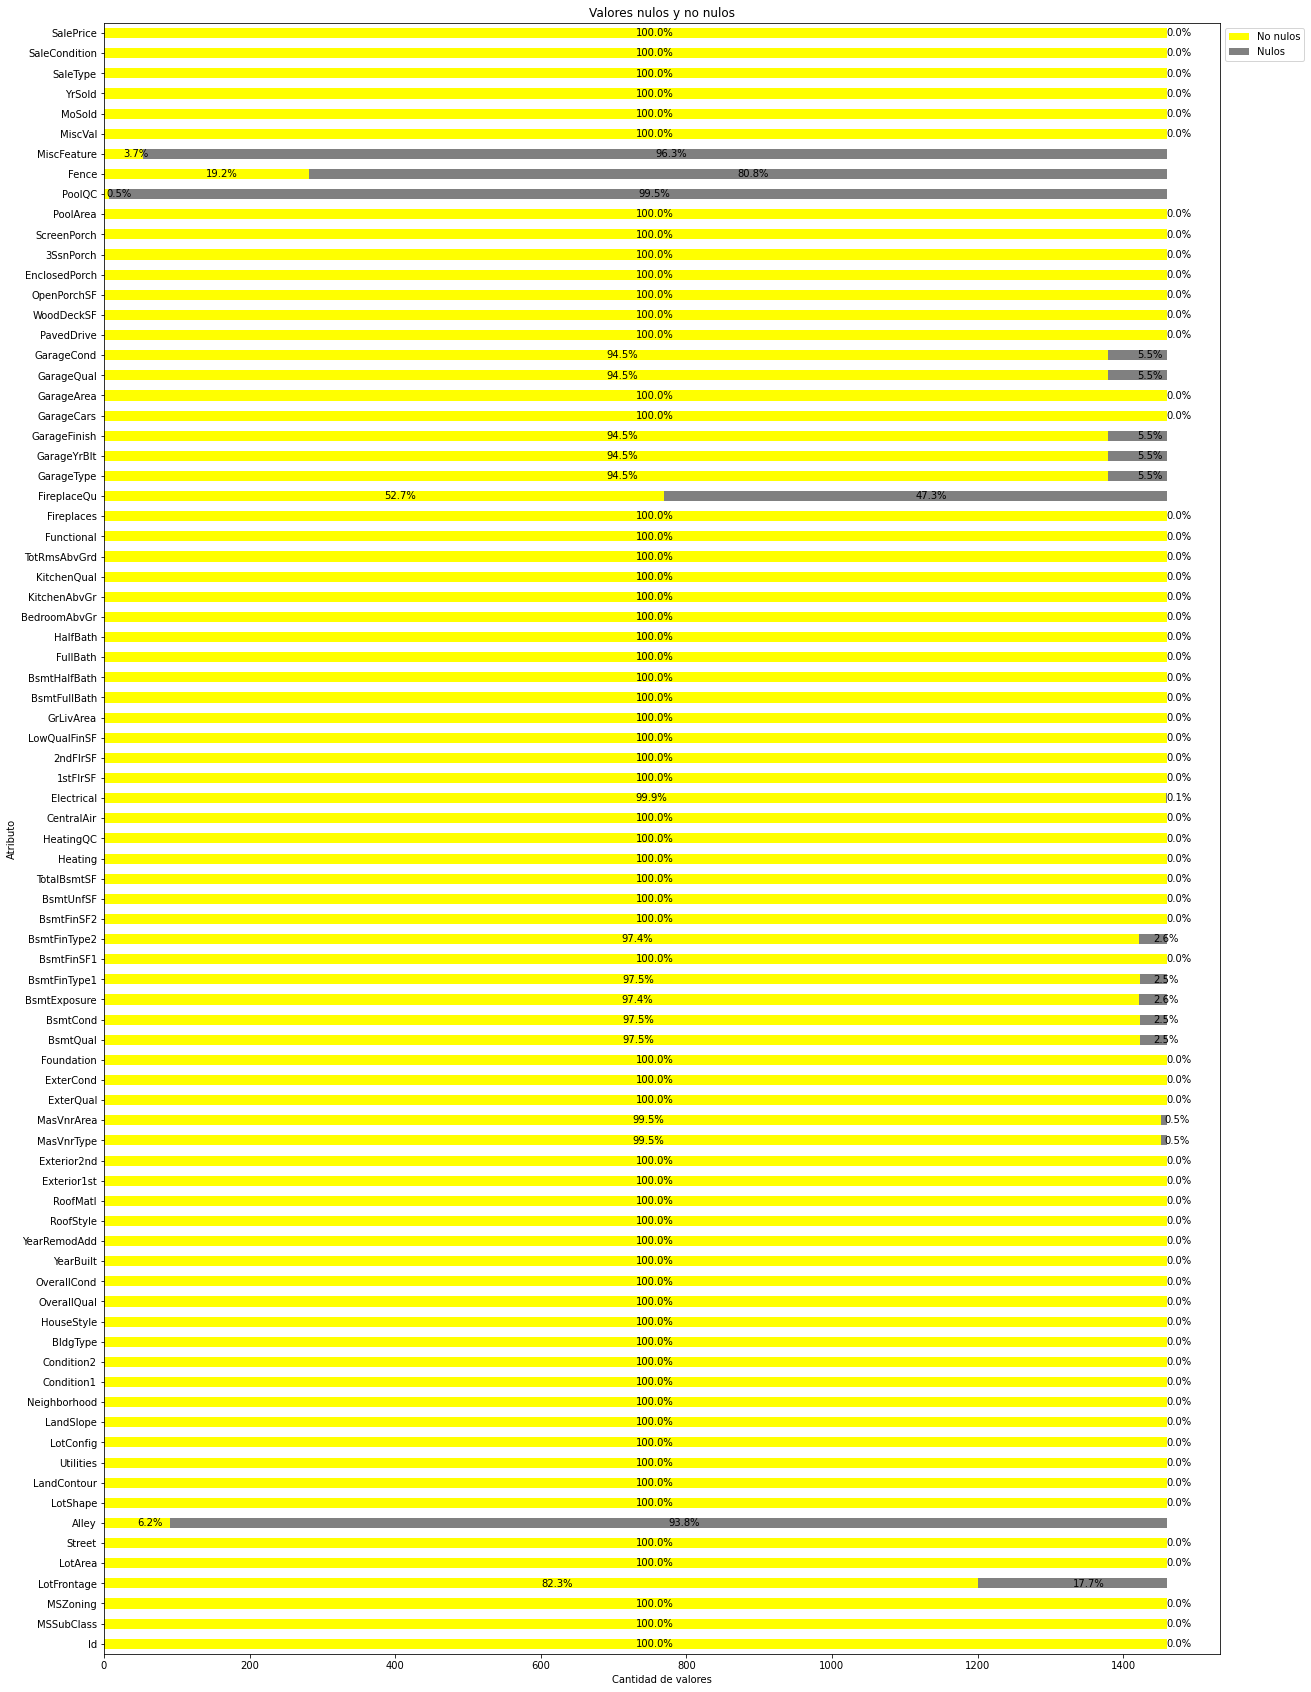

In [6]:
Data_total.plot( 
    x = 'Atributo', 
    kind = 'barh', 
    stacked = True, 
    title = 'Valores nulos y no nulos', 
    mark_right = False,
    color=["yellow","gray"],
    figsize=(20,30))
plt.xlabel('Cantidad de valores')
plt.legend(labels = ['No nulos','Nulos'],loc = 0, bbox_to_anchor = (1,1))

Data_totales = Data_total["Not null"] + Data_total["Null"]
Data_rel =Data_total[Data_total.columns[1:]].div(Data_totales, 0)*100

for n in Data_rel: 
    for i,(cs, ab, pc) in enumerate(zip(Data_total.iloc[:, 1:].cumsum(1)[n],
                                         Data_total[n], Data_rel[n])): 
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',
                 va = 'center', ha = 'left')

#### 4. Tratamiento de datos faltantes:

Eliminamos columnas con gran cantidad de valores faltantes


In [97]:
Data = Data.drop(['Id','Alley','PoolQC','Fence','MiscFeature'], axis=1)

LotFrontage y MasVnrArea: Reemplazaremos los valores faltantes con la media

In [98]:
Data.LotFrontage = Data.LotFrontage.fillna(Data.LotFrontage.mean())
Data.MasVnrArea = Data.MasVnrArea.fillna(Data.MasVnrArea.mean())
Data.Electrical = Data.Electrical.fillna(Data.Electrical.mode())

Electrical: Reemplazaremos los valores faltantes con la moda

In [99]:
Data.Electrical.mode()

0    SBrkr
Name: Electrical, dtype: object

In [100]:
Data.Electrical = Data.Electrical.fillna("SBrkr")

FireplaceQu, BsmtQual, BsmtCond, MasVnrType y características relacionadas con el garaje: reemplazamos todos los valores faltantes con "NA"

In [101]:
Data.FireplaceQu = Data.FireplaceQu.fillna("None")

Data.BsmtQual = Data.BsmtQual.fillna("None")
Data.BsmtCond = Data.BsmtCond.fillna("None")

Data.BsmtExposure = Data.BsmtExposure.fillna("None")
Data.BsmtFinType1 = Data.BsmtFinType1.fillna("None")
Data.BsmtFinType2 = Data.BsmtFinType2.fillna("None")

Data.MasVnrType = Data.MasVnrType.fillna("None") 

Data.GarageType = Data.GarageType.fillna("None")
Data.GarageYrBlt = Data.GarageYrBlt.fillna("None")
Data.GarageFinish = Data.GarageFinish.fillna("None")
Data.GarageQual = Data.GarageQual.fillna("None")
Data.GarageCond = Data.GarageCond.fillna("None")

#### 5. Tratamiento de outliers

Hay 22 casos en los que 'SalePrice' está 3 std por encima de la media, pero hay cero casos de lo contrario.

In [102]:
print("+3std:", Data.SalePrice[(Data.SalePrice > np.mean(Data.SalePrice) + 3*np.std(Data.SalePrice))].count(), "\n-3std:",

Data.SalePrice[(Data.SalePrice < np.mean(Data.SalePrice) - 3*np.std(Data.SalePrice))].count())

+3std: 22 
-3std: 0


Hay 16 casos en los que 'GrLivArea' está 3 std por encima de la media, pero hay cero casos de lo contrario.

In [103]:
print("+3std:", Data.GrLivArea[(Data.GrLivArea > np.mean(Data.GrLivArea) + 3*np.std(Data.GrLivArea))].count(), "\n-3std:",

Data.GrLivArea[(Data.GrLivArea < np.mean(Data.GrLivArea) - 3*np.std(Data.GrLivArea))].count())

+3std: 16 
-3std: 0


Si bien se detectaron 38 outliers en estas variables, estos no se eliminan, debido a que introducirían un sesgo, disminuirían el tamaño muestral y a que podrían afectar la distribución

#### 6. Codificación de variables categóricas

 Codificación ordinal de las variables ExterQual, BsmtQual y FireplaceQu

In [104]:
Data.ExterQual.unique().tolist()

['Gd', 'TA', 'Ex', 'Fa']

In [105]:
# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['Gd', 'TA', 'Ex', 'Fa']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(Data[["ExterQual"]])
Data["ExterQual-encoded"] = encoder.transform(Data[["ExterQual"]])
Data = Data.drop('ExterQual',axis =1)

In [106]:
Data.BsmtQual.unique().tolist()

['Gd', 'TA', 'Ex', 'None', 'Fa']

In [107]:
# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['Gd', 'TA', 'Ex', 'None', 'Fa']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(Data[["BsmtQual"]])
Data["BsmtQual-encoded"] = encoder.transform(Data[["BsmtQual"]])
Data = Data.drop('BsmtQual',axis =1)

In [108]:
Data.FireplaceQu.unique().tolist()

['None', 'TA', 'Gd', 'Fa', 'Ex', 'Po']

In [109]:
# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['None', 'TA', 'Gd', 'Fa', 'Ex', 'Po']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(Data[["FireplaceQu"]])
Data["FireplaceQu-encoded"] = encoder.transform(Data[["FireplaceQu"]])
Data = Data.drop('FireplaceQu',axis =1)

#### Análisis de la variable Neighborhood

Nueva variable "precio por pie cuadrado" utilizando "GrLivArea" como denominador:

In [110]:
Data['PriceSF'] = Data.SalePrice / Data.GrLivArea

La prima de precio difiere significativamente

In [111]:
neigh_mean = Data['PriceSF'].groupby(Data['Neighborhood']).count().sort_values()
neigh_mean

Neighborhood
Blueste      2
NPkVill      9
Veenker     11
BrDale      16
MeadowV     17
Blmngtn     17
StoneBr     25
SWISU       25
ClearCr     28
IDOTRR      37
Timber      38
NoRidge     41
Mitchel     49
Crawfor     51
BrkSide     58
SawyerW     59
NWAmes      73
Sawyer      74
NridgHt     77
Gilbert     79
Somerst     86
Edwards    100
OldTown    113
CollgCr    150
NAmes      225
Name: PriceSF, dtype: int64

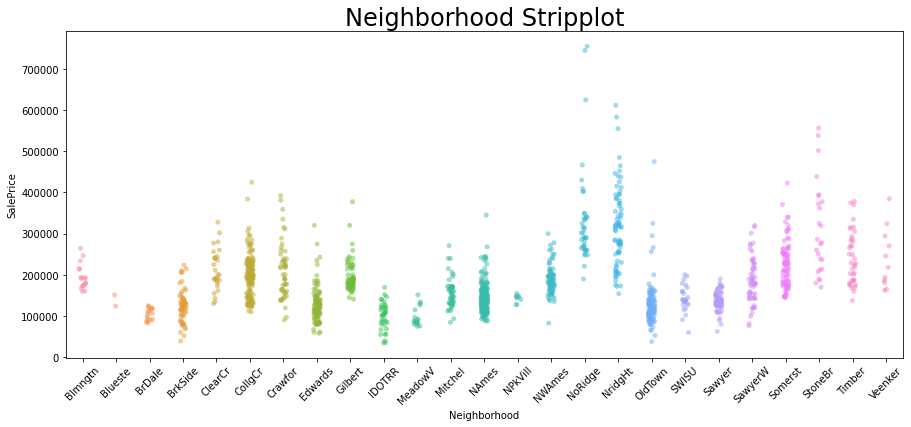

In [112]:
fig, ax = plt.subplots(figsize=(15,6))

sns.stripplot(x = Data.Neighborhood, y = Data.SalePrice, order = np.sort(Data.Neighborhood.unique()),
              jitter=0.1, alpha=0.5, ax=ax)
plt.title('Neighborhood Stripplot', fontsize=24)
plt.xticks(rotation=45)
plt.show()

In [113]:
def add_location(x):
    if 'MeadowV' in x or 'Edwards' in x or 'Sawyer' in x or 'Landmrk' in x or 'SWISU' in x or 'BrDale' in x or 'IDOTRR' in x:
        return 1
    elif 'NAmes' in x or 'Mitchel' in x or 'BrkSide' in x or 'NPkVill' in x or 'OldTown' in x or 'ClearCr' in x or 'Gilbert' in x:
        return 2
    elif 'SawyerW' in x or 'NWAmes' in x or 'Crawfor' in x or 'CollgCr' in x or 'Blueste' in x or 'GrnHill' in x or 'Blmngtn' in x:
        return 3
    else:
        return 4

In [114]:
Data['Location'] = Data.Neighborhood.map(add_location)

Correlación positiva entre 'SalePrice' y 'Location'

In [115]:
# Positive correlation between 'SalePrice' and 'PriceSF' with 'Location'
print(Data['SalePrice'].groupby(Data.Location).mean())

Location
1    135879.628049
2    150934.493761
3    197355.587031
4    277255.359712
Name: SalePrice, dtype: float64


In [116]:
Data = Data.drop('Neighborhood',axis =1)

#### 7. Variables dummies

In [117]:
columns = Data.columns
categoricas = []
for col in columns:
  if Data[col].dtypes=='object':
    categoricas.append(col)
print(categoricas)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [118]:
for col in categoricas:
  print(col ,':',len(Data[col].unique()), Data[col].unique())

MSZoning : 5 ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : 2 ['Pave' 'Grvl']
LotShape : 4 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : 4 ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : 2 ['AllPub' 'NoSeWa']
LotConfig : 5 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : 3 ['Gtl' 'Mod' 'Sev']
Condition1 : 9 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : 8 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : 5 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : 8 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : 6 ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : 8 ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st : 15 ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Exterior2nd : 16 ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace'

In [119]:
cat_col_to_numeric = pd.get_dummies(Data, columns=categoricas,drop_first=False)

cat_col_to_numeric.shape

(1460, 348)

In [120]:
# Eliminación de las variables categóricas en el dataframe Data:
Data = Data.drop(categoricas,axis=1)

In [121]:
# Concatenación en un nuevo dataframe:
Data = pd.concat([Data,cat_col_to_numeric])

Data.shape

(2920, 348)

In [122]:
Data = Data.fillna(0)

#### 8. Entrenamiento del modelo

In [126]:
X = Data.drop('SalePrice',axis =1).values
y = Data['SalePrice'].values

In [127]:
#splitting Train and Test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [128]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss= "mse")

In [129]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=1000)
model.summary()

Epoch 1/1000
16/16 [==============================] - 2s 42ms/step - loss: 38330191872.0000 - val_loss: 38105538560.0000
Epoch 2/1000
16/16 [==============================] - 0s 18ms/step - loss: 36041461760.0000 - val_loss: 33731395584.0000
Epoch 3/1000
16/16 [==============================] - 0s 16ms/step - loss: 28550139904.0000 - val_loss: 20862257152.0000
Epoch 4/1000
16/16 [==============================] - 0s 16ms/step - loss: 13619023872.0000 - val_loss: 6360214016.0000
Epoch 5/1000
16/16 [==============================] - 0s 18ms/step - loss: 9256695808.0000 - val_loss: 5600947712.0000
Epoch 6/1000
16/16 [==============================] - 0s 21ms/step - loss: 7013922816.0000 - val_loss: 5147759616.0000
Epoch 7/1000
16/16 [==============================] - 0s 19ms/step - loss: 5580664320.0000 - val_loss: 4358031360.0000
Epoch 8/1000
16/16 [==============================] - 0s 20ms/step - loss: 4586196992.0000 - val_loss: 3904783872.0000
Epoch 9/1000
16/16 [=====================

#### Entrenamiento del modelo completo

<AxesSubplot:>

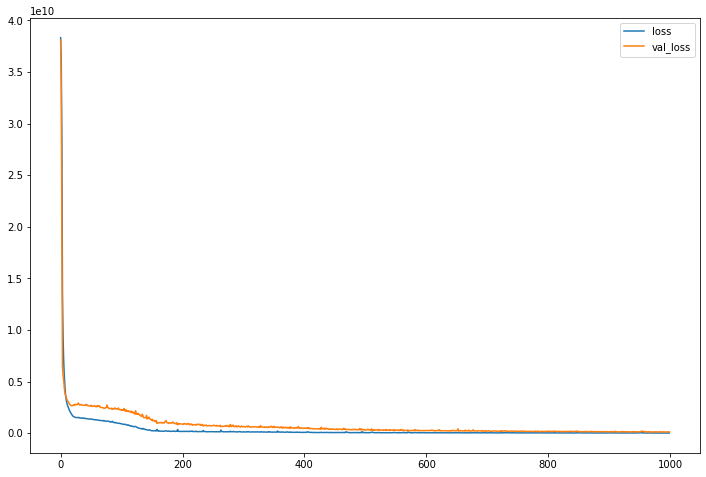

In [130]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

## Resultados obtenidos

MAE: 3324.110065887578
MSE: 118403266.08580635
RMSE: 10881.32648558099
VarScore: 0.9817379379839103


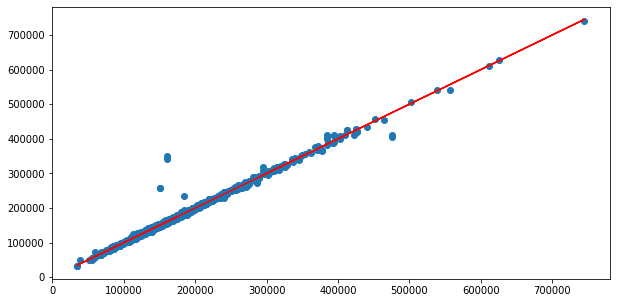

In [131]:
y_pred = model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

c:\Users\Facu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

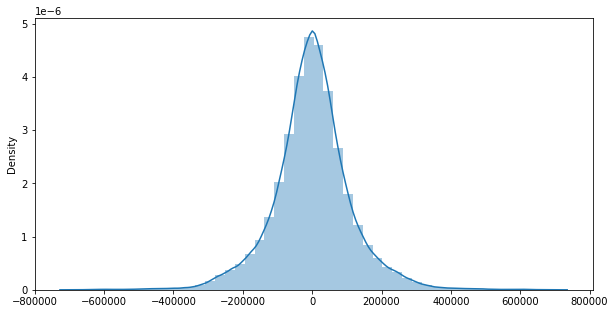

In [132]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [133]:
mean_squared_log_error(y_test, y_pred, squared=False)

0.049078200765782204